In [1]:
import pandas as pd

<h2>Reading CSV file

In [2]:
train = pd.read_csv(r'C:\Users\sanke\OneDrive\Desktop\sanketh\Projects for Submission\Project 4 - California Housing Price Prediction\Dataset for the project\housing.csv')

In [3]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<h2>Checking For NULL values

In [4]:
train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
train.shape

(20640, 10)

<h2>Drop Null Values

In [6]:
train.dropna(inplace=True)

In [7]:
train.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
ocean_proximity           5
median_house_value     3833
dtype: int64

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

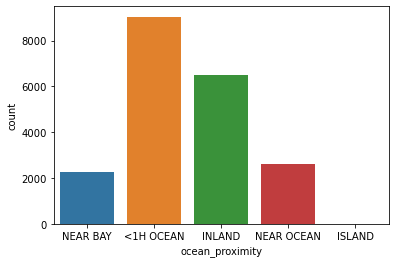

In [9]:
sns.countplot(train['ocean_proximity'])

<h2>Get dummy variables for ocean_proximity

In [10]:
train = pd.get_dummies(data=train,columns=['ocean_proximity'])

In [11]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


<h2>Correlation between variables

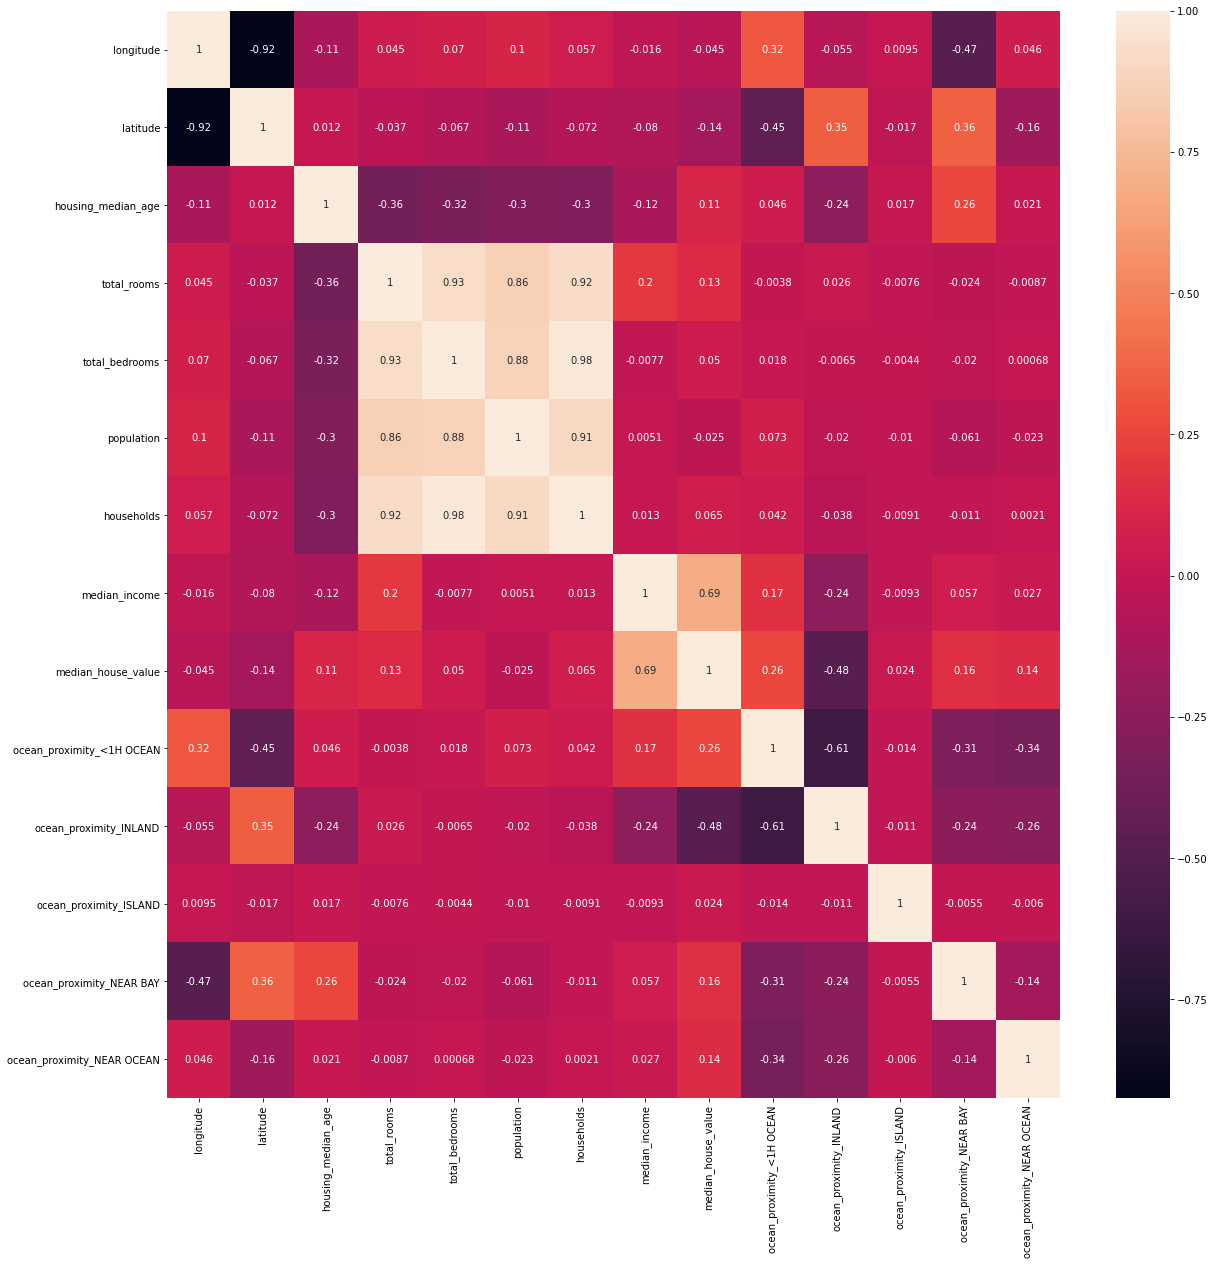

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)


<h2>Import required Regressor Models

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
y = train['median_house_value']

In [15]:
X = train.drop('median_house_value',axis=1)

In [16]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [17]:
X.shape

(20433, 13)

<h2>Scale the variables

In [18]:
sc = StandardScaler()
sc.fit(X)
new_X = sc.transform(X)

In [19]:
X = pd.DataFrame(data=new_X,columns=X.columns)

In [20]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,-0.890239,-0.682713,-0.015645,2.828661,-0.384186


In [21]:
import numpy as np

In [22]:
 y = y.values.reshape(-1,1)  

In [23]:
sc = StandardScaler()
sc.fit(y)
new_y = sc.transform(y)

<h2>Split dataFrame into train and test

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,new_y,test_size=0.2)

In [26]:
X_train.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

<h2>DecisionTree Regressor

In [37]:
dc = DecisionTreeRegressor()
dc.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:
preds = dc.predict(X_test)

In [39]:
mean_squared_error(y_test,preds)

0.34014269006412

In [40]:
r2_score(y_test,preds)

0.6521213789956446

<h2>RandomForestRegressor

In [31]:
from sklearn.model_selection import cross_val_score

In [41]:
rf = RandomForestRegressor()
#clf = cross_val_score(rf,X,new_y,cv=5,scoring='r2')
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)


<ipython-input-41-be8376143671>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [42]:
r2_score(y_test,y_preds)

0.8279478868619442

In [47]:
mean_squared_error(y_test,y_preds)

0.1682261141113984

In [49]:
predictions = pd.DataFrame(y_preds)

<h2>To get predicted house values dont scale house values in the beginning

In [50]:
predictions.to_csv('californiasubmission.csv')